In [29]:
# TASK DEFINITIONS
tasks = {
    # Custom Actions
    "brush teeth": {
        "needs": {"toothpaste": 1},  # Requires 1 unit of water
        "depletes": {"toothpaste": 1},  # Depletes 1 unit of toothpaste
        "place": "bathroom",  # Needs to be in the bathroom
        "cost": 15,  # Cost of brushing teeth
    },
    "drink water": {
        "needs": {"water": 1},  # Requires 1 unit of water
        "depletes": {"water": 1},  # Depletes 1 unit of water
        "place": "kitchen",
        "cost": 5,
    },
    "clean dish": {
        "needs": {"soap": 1},  # Requires 1 unit of soap
        "depletes": {"soap": 1},  # Depletes 1 unit of soap
        "place": "kitchen",
        "cost": 12,
    },
    "make soup": {
        "needs": {"water": 1, "tomato": 1},  # Requires 1 unit of water
        "depletes": {"water": 1, "tomato": 1},  # Depletes 1 unit of water
        "place": "kitchen",
        "cost": 12,
    },
    # Buy actions with costs
    "buy water": {
        "needs": {},  # No specific resource needs
        "depletes": {},  # No resources are depleted
        "place": "store",
        "cost": 20,
    },
    "buy toothpaste": {
        "needs": {},  # No specific resource needs
        "depletes": {},  # No resources are depleted
        "place": "store",
        "cost": 10,
    },
    "buy soap": {
        "needs": {},
        "depletes": {},
        "place": "store",
        "cost": 3,
    },

    # Refill actions with costs
    "refill toothpaste": {
        "needs": {},  # No specific resource needs
        "depletes": {},  # No resources are depleted
        "place": "storage",
        "cost": 6,
    },
    "refill soap": {
        "needs": {},
        "depletes": {},  
        "place": "storage",
        "cost": 1,
    },

    # INTERFACE
    "go to": {
        "needs": {},  # No specific resource needs  
        "depletes": {},  # No resources are depleted
        "place": {},
        "cost": 5,
    },
    "check": {
        "needs": {},
        "depletes": {},
        "place": {},
        "cost": 3,
    },
    "check inventory": {
        "needs": {},
        "depletes": {}, 
        "place": {},
        "cost": 1,
    }
    
}
temp_tasks = tasks.copy()

In [30]:
# STORAGES
main_stock = {}  # Main stock for refilling room-specific stocks
room_stocks = {}

In [31]:
# CHECK LEVELS OF RESOURCE
def check_needs(task, stringify=False):
    task = task.lower()
    if stringify:
        string = [f"{value} {key}" for key, value in tasks.get(task, {}).get("needs", {}).items()]
        formatted_string = ", ".join(string)
        if formatted_string == "":
            formatted_string = "no resources."
        return formatted_string
    else:
        return tasks.get(task, {}).get("needs", {})

# Method to check what a task depletes
def check_depletes(task):
    return tasks.get(task, {}).get("depletes", {})

def check_place(task):
    return tasks.get(task, {}).get("place", "")

def check_main_stock(resource):
    return main_stock.get(resource, 0)

# Method to check stock in a specific room
def check_room_stock(room, resource):
    return room_stocks.get(room, {}).get(resource, 0)

In [32]:
print(check_needs("Clean dish", stringify=True))

1 soap


In [33]:
# INITIALIZE PLAYER AND GAME
player_location = "bedroom"  # Starting location
total_cost = 0  # Track total cost

In [34]:
# Initialize main stock with resources
def init_main_stock(resources):
    global main_stock
    main_stock = resources.copy()

def init_room_stock(resources):
    global room_stocks
    room_stocks = resources.copy()

In [35]:
# Method to refill resources in a room from the main stock
def refill_room(room, resource, X):
    global total_cost, main_stock, room_stocks
    if main_stock.get(resource, 0) >= X:
        room_stocks[room][resource] += X
        main_stock[resource] -= X
        print(f"Refilled {X} {resource}(s) in the {room}. Main stock left: {main_stock[resource]}.")
        return True
    else:
        print(f"Not enough {resource} in the storage to refill {room}. Needed: {X}, Available: {main_stock.get(resource, 0)}.")
        return False

# Method to buy resources from the store to replenish the main stock
def buy_resource(resource, X):
    global total_cost, room_stocks, main_stock
    if room_stocks["store"].get(resource, 0) >= X:
        room_stocks["store"][resource] -= X
        main_stock[resource] = main_stock.get(resource, 0) + X
        print(f"Bought {X} {resource}(s) from the store. ")
        return True
    else:
        print(f"Store doesn't have enough {resource}. Needed: {X}, Available: {room_stocks['store'].get(resource, 0)}.")
        return False

# Method to change location
def goto(place):
    global player_location, total_cost
    if player_location != place:
        player_location = place
        print(f"Moved to {place}.")
    else:
        print(f"Already at {place}.")
    
# Method to check current location
def where():
    return player_location

In [36]:
def check_task_exist(task):
    amount = 0
    room = ''
    resource = 'NOT FOUND - the task existor checker'
    # go to storage
    if 'go to' in task:
         task = task.split()
         return True, ' '.join(task[:2]), 0, '', ' '.join(task[2:])
    
    # check inventory for water
    if 'check inventory' in task:
         # WARNING! check inventory does not return resource name
         return True, task.split()[0] + ' ' + task.split()[1], 0, '', ''
    
    # check kitchen for soap
    if 'check' in task:
         return True, task.split()[0], 0, '', ''
    
    # Buy 5 apple
    if 'buy' in task:
        task = task.split()
        amount = task[1]
        resource = ' '.join(task[2:])
        task.pop(1)
        task = ' '.join(task)

    # Refill kitchen with 6 water
    if 'refill' in task:
        words = task.split()
        index = words.index('with')
        amount = words[index+1]
        resource = ' '.join(words[index+2:])
        task = 'refill '
        for word in words:
            if word.isdigit():
                task += ' '.join(words[words.index(word)+1:])
                room = ' '.join(words[1:words.index(word)-1])
        
        
    if task not in tasks:
        print(f"Task '{task}' not recognized.")
        return False, task, amount, resource, room
    else:
        return True, task, amount, resource, room
    
print(check_task_exist("go to living room"))

(True, 'go to', 0, '', 'living room')


In [37]:
def lowercase_list(input_list):
    return [item.lower() for item in input_list]

In [38]:
def check_task_coverage(list1, list2):
    # Checks if the og list is a subset of the candidate list
    return set(list2).issubset(set(list1))

In [39]:
# Function to execute tasks

def execute_tasks(task_list, needed_tasks):
    print("Now executing", task_list, "AGAINST", needed_tasks)

    def get_return_func(outcome):
        return outcome, accuracy, total_cost
    
    # Set up cost variables
    global total_cost
    total_cost = 0

    # Tracking accuracy
    completed_tasks = []
    accuracy = 0

    task_list = lowercase_list(task_list)
    needed_tasks = lowercase_list(needed_tasks)

    if not check_task_coverage(task_list, needed_tasks):
        print("given task list is not a subset of needed tasks")
    for task in task_list:
        task = task.lower()
        print("Now executing", task)
        quant = False
        # Check if task exists
        bool_key = check_task_exist(task) # (Task valid bool, viable task key, amount, resource, room)
        if not bool_key[0]:
            return get_return_func("Failure, the task does not exist in the task dictionary.")
        
        elif 'check inventory' in task:
            resource = task.split()[3]
            print(check_main_stock(resource))

        elif 'check' in task:
            room = task.split()[1]
            resource = task.split()[3]
            print(check_room_stock(room, resource))

        elif 'go to' in task or 'Go to' in task:
            place = bool_key[4]
            goto(place)
        else:
            place = check_place(bool_key[1])
        
            # Now process place conditioned tasks
            if where() != place:
                print(f'Must be at {place}. You are at {where()}.')
                return get_return_func("Failure" + f'Must be at {place}. You are at {where()}.')


            elif 'buy' in task:
                resource = bool_key[3]
                quantity = int(bool_key[2])
                buy_success = buy_resource(resource, quantity)
                if not buy_success:
                    return f"Failure, buying {resource} failed. Walmart doesnt have enough {resource}.", accuracy, total_cost
                quant = True

            elif 'refill' in task:
                room = bool_key[4]
                resource = bool_key[3]
                quantity = int(bool_key[2])
                refill_success = refill_room(room, resource, quantity)
                if not refill_success:
                    return f"Failure, refilling {resource} in {room} failed", accuracy, total_cost
                quant = True
            else:
                # Check if required resources are available in the current room
                needs = check_needs(task)
                for resource, amount in needs.items():
                    if check_room_stock(where(), resource) < amount:
                        print(f"Not enough {resource} in {where()} to complete {task}. Needed: {amount}, Available: {check_room_stock(where(), resource)}.")
                        return get_return_func("Failure, !needs_req" + f"Not enough {resource} in {where()} to complete {task}. Needed: {amount}, Available: {check_room_stock(where(), resource)}.")
                
                # Deplete resources from the room stock
                depletes = check_depletes(task)
                for resource, amount in depletes.items():
                    if check_room_stock(where(), resource) >= amount:
                        print(where(), resource, amount)
                        room_stocks[where()][resource] -= amount
                        print(f"Depleted {amount} {resource}(s) in {where()} for {task}. Remaining: {room_stocks[where()][resource]}")
                    else:
                        print(f"Not enough {resource} in {where()} to complete {task}. Needed: {amount}, Available: {check_room_stock(where(), resource)}.")
                        return get_return_func("Failure" + f"Not enough {resource} in {where()} to complete {task}. Needed: {amount}, Available: {check_room_stock(where(), resource)}.")

        # Add task cost to total cost
        task_cost = tasks[bool_key[1]]["cost"]
        if quant == True:
            task_cost = quantity * task_cost
        total_cost += task_cost

        if task in needed_tasks:
            completed_tasks.append(task)
        accuracy = len(completed_tasks) / len(needed_tasks)
        print(f"Executed {task} for cost {task_cost}. New total cost: {total_cost}")
    
    print(f"All tasks executed successfully. Total cost: {total_cost}")
    return get_return_func("Success")

In [124]:
def prompt_maker(task_list, CoT = False):
    print("WELCOME TO THE GAME! Getting prompt...")
    initial_prompt = f"Hello! You are a butler in a home that has many rooms and a storage that acts as a pantry. You goal is to finish the tasks I will give you. Beware! These tasks require resources and may even deplete resources. You can use the storage to refill them! If even the storage doesn't have enough resources, you can buy from the store! \n"
    initial_prompt += f"You are standing in the {where()}. The home has: \n"
    # TODO: specify amount needed for each task
    
    # Give the agent rooms and their stock counts.
    room_str = ''
    for key, sub_dict in room_stocks.items():
        # Create a list of "value subkey" pairs
        sub_items = [f"{value} {sub_key}" for sub_key, value in sub_dict.items()]
        if sub_items == []:
            continue
        
        # Join the items with commas and "and" for the last item
        sub_items_joined = ", ".join(sub_items[:-1]) + " and " + sub_items[-1]
        
        # Print the sentence for each outer dictionary key
        room_str +=(f"A {key} with {sub_items_joined}. \n")
    initial_prompt += room_str
    initial_prompt += f"Your home's storage has: \n"

    stock_str = ', '.join([f"{value} {key}" for key, value in main_stock.items()])
    initial_prompt += f"{stock_str}. \n"

    # tasks
    initial_prompt += f"\n Your tasks are: \n"
    task_set = set()
    for task in task_list:
        task_set.add(task)
        initial_prompt += f"Task: {task}\n"
    for tasks in task_set:
        needs = check_needs(tasks, stringify=True)
        initial_prompt += f"The task {tasks} needs {needs} \n"
    

    # final instructions
    initial_prompt += f"\n These tasks are given in a random order.Your job is to rearrange these tasks in the correct order. You can also add go to, buy, and refill commands.\n Be careful about the given resource contraints and where you are. \n You can add refill, buy, and go to commands at a cost. \nFor example, the costs of buying one item are proportional to real world costs.\n"
    initial_prompt += f"\n You can buy items from the store to restock your storage by saying: \"buy <amount> <item>\" You must be in the store to buy items. For example: \'buy 3 water.\' and you must 'go to store.' beforehand \n"
    initial_prompt += f"You can refill any room with items in your storage by saying: \"refill <room_name> with <amount> <item>\" You must be in the storage to refill items. For example: \'refill kitchen with 7 toothpaste.\' and you must 'go to storage.' beforehand\n"
    initial_prompt += f"You can go to a room by saying \"go to <room_name>\". For example: \'go to store\'.\n"
    initial_prompt += f"If a room doesn't have enough resources, you can refill from the storage. If even the storage doesn't have enough resources, you can buy from the store. \n"
    initial_prompt += f"Remember to not edit the tasks with anything. Example: \"brush teeth\" remains as \"brush teeth\" with no other descriptions in the final list.\n"
    initial_prompt += f"Lastly, format your final list of tasks as a python list. For example: [\"go to store\", \"buy 3 toothpaste\"]. Your list's tasks will then be executed by a custom python executor one by one.\n"
    
    if CoT == True:
        initial_prompt += f"Reason through each step of the plan before proceeding. Explain your thought process for the correct order of actions."
    
    return initial_prompt, room_str, stock_str

In [81]:
# Initialize storage/pantry with resources
# Easy Example
init_main_stock({"water": 5, "toothpaste": 0})
init_room_stock({# Dictionary to hold stocks for each room
    "bedroom" : {"water": 0, "bed": 1},
    "kitchen": {"water": 0, "soap": 1},
    "bathroom": {"water": 0, "toothpaste": 0},
    "store": {"water": 100, "soap": 100, "toothpaste": 100},})

# Define a list of tasks to execute
task_list = ["brush teeth"]

print(prompt_maker(task_list))

candidate_task_list = [
    "go to store",
    "buy 3 toothpaste",
    "go to storage",
    "refill bathroom with 1 toothpaste",
    "go to bathroom",
    "brush teeth"
]
# result = execute_tasks(task_list)
result_correct = execute_tasks(candidate_task_list, task_list)
# print(result)
print(result_correct)





WELCOME TO THE GAME


AttributeError: 'list' object has no attribute 'get'

In [42]:
# Harder Example INCOORECT BRONZE

init_main_stock({"water": 5, "toothpaste": 0, "soap": 1})
goto("bedroom")

task_list = ["Clean dish",
             "Clean dish",
             "Clean dish"]
print(prompt_maker(task_list))

candidate_task_list = [
    "go to kitchen",
    "Clean dish",
    "clean dish",
    "Clean dish"
]
execute_tasks(candidate_task_list, task_list)

Moved to bedroom.
WELCOME TO THE GAME
Hello! You are a butler in a home that has many rooms and a storage that acts as a pantry. You goal is to finish the tasks I will give you. Beware! These tasks require resources and may even deplete resources. You can use the storage to refill them! If even the storage doesn't have enough resources, you can buy from the store! 
You are standing in the bedroom. The home has: 
A bedroom with 0 water and 1 bed. 
A kitchen with 0 water and 1 soap. 
A bathroom with 0 water and 0 toothpaste. 
A store with 100 water, 100 soap and 97 toothpaste. 
Your home's storage has: 
5 water, 0 toothpaste, 1 soap. 

 Your tasks are: 
Task: Clean dish
Task: Clean dish
Task: Clean dish
The task Clean dish needs 1 soap 

 These tasks are given in a random order.Your job is to rearrange these tasks in the correct order. You can also add go to, buy, and refill commands.
 Be careful about the given resource contraints and where you are. 
 You can add refill, buy, and go to 

('Failure, !needs_reqNot enough soap in kitchen to complete clean dish. Needed: 1, Available: 0.',
 0.3333333333333333,
 17)

In [43]:
# Harder Example SOLVED GOLD

init_main_stock({"water": 5, "toothpaste": 0, "soap": 1})
init_room_stock(
    {"bedroom" : {"water": 0, "bed": 1},
    "kitchen": {"water": 0, "soap": 1},
    "bathroom": {"water": 0, "toothpaste": 0},
    "store": {"water": 100, "soap": 100, "toothpaste": 100}},
)
goto("bedroom")
room_stocks["kitchen"]["soap"] = 1

task_list = ["Clean dish",
             "Clean dish",
             "Clean dish"]
print(prompt_maker(task_list))

candidate_task_list = [
    "go to store",
    "Buy 1 soap",
    "go to storage",
    "Refill kitchen with 2 soap",
    "go to kitchen",
    "Clean dish",
    "clean dish",
    "Clean dish"
]
execute_tasks(candidate_task_list, task_list)

Moved to bedroom.
WELCOME TO THE GAME
Hello! You are a butler in a home that has many rooms and a storage that acts as a pantry. You goal is to finish the tasks I will give you. Beware! These tasks require resources and may even deplete resources. You can use the storage to refill them! If even the storage doesn't have enough resources, you can buy from the store! 
You are standing in the bedroom. The home has: 
A bedroom with 0 water and 1 bed. 
A kitchen with 0 water and 1 soap. 
A bathroom with 0 water and 0 toothpaste. 
A store with 100 water, 100 soap and 100 toothpaste. 
Your home's storage has: 
5 water, 0 toothpaste, 1 soap. 

 Your tasks are: 
Task: Clean dish
Task: Clean dish
Task: Clean dish
The task Clean dish needs 1 soap 

 These tasks are given in a random order.Your job is to rearrange these tasks in the correct order. You can also add go to, buy, and refill commands.
 Be careful about the given resource contraints and where you are. 
 You can add refill, buy, and go to

('Success', 1.0, 56)

In [44]:
# Harder Example SOLVED SILVER

init_main_stock({"water": 5, "toothpaste": 0, "soap": 1})
goto("bedroom")
room_stocks["kitchen"]["soap"] = 1

task_list = ["Clean dish",
             "Clean dish",
             "Clean dish"]
print(prompt_maker(task_list))

candidate_task_list = [
    "go to kitchen",
    "clean dish",
    "go to storage",
    "refill kitchen with 1 soap",
    "go to kitchen",
    "clean dish",
    "go to store",
    "buy 1 soap",
    "go to storage",
    "refill kitchen with 1 soap",
    "go to kitchen",
    "clean dish"
]
execute_tasks(candidate_task_list, task_list)

Moved to bedroom.
WELCOME TO THE GAME
Hello! You are a butler in a home that has many rooms and a storage that acts as a pantry. You goal is to finish the tasks I will give you. Beware! These tasks require resources and may even deplete resources. You can use the storage to refill them! If even the storage doesn't have enough resources, you can buy from the store! 
You are standing in the bedroom. The home has: 
A bedroom with 0 water and 1 bed. 
A kitchen with 0 water and 1 soap. 
A bathroom with 0 water and 0 toothpaste. 
A store with 100 water, 99 soap and 100 toothpaste. 
Your home's storage has: 
5 water, 0 toothpaste, 1 soap. 

 Your tasks are: 
Task: Clean dish
Task: Clean dish
Task: Clean dish
The task Clean dish needs 1 soap 

 These tasks are given in a random order.Your job is to rearrange these tasks in the correct order. You can also add go to, buy, and refill commands.
 Be careful about the given resource contraints and where you are. 
 You can add refill, buy, and go to 

('Success', 1.0, 71)

In [113]:
def setup_hard():
    init_main_stock({"water": 5, "toothpaste": 0, "soap": 1})
    init_room_stock({# Dictionary to hold stocks for each room
    "bedroom" : {"water": 0, "bed": 1},
    "kitchen": {"water": 0, "soap": 1},
    "bathroom": {"water": 0, "toothpaste": 0},
    "store": {"water": 100, "soap": 100, "toothpaste": 100},})
    room_stocks['kitchen']['soap'] = 0
    goto("bedroom")
    room_stocks["kitchen"]["soap"] = 1

    task_list = ["Clean dish",
                "Clean dish",
                "Clean dish"]
    
    prompt =prompt_maker(task_list)
    return prompt, task_list

TESTING with GPT.
You can use the get_GPT_plan method to feed the prompt and get a task list. You can use the setup() method to reset storage levels.

In [46]:
from openai import OpenAI
from pydantic import BaseModel

client = OpenAI()

class TaskList(BaseModel):
    tasklist: list[str]

def get_GPT_plan(prompt):
  response = client.beta.chat.completions.parse(
    model="gpt-4o-2024-08-06",
    messages=[
      {"role": "system", "content": "You are a master task scheduler that outputs a list of tasks in the correct order given a long horizon task."},
      {"role": "user", "content": prompt}
    ],
    response_format=TaskList
  )
  return response.choices[0].message.parsed.tasklist

Moved to bedroom.
WELCOME TO THE GAME
Hello! You are a butler in a home that has many rooms and a storage that acts as a pantry. You goal is to finish the tasks I will give you. Beware! These tasks require resources and may even deplete resources. You can use the storage to refill them! If even the storage doesn't have enough resources, you can buy from the store! 
You are standing in the bedroom. The home has: 
A bedroom with 0 water and 1 bed. 
A kitchen with 0 water and 1 soap. 
A bathroom with 0 water and 0 toothpaste. 
A store with 100 water, 100 soap and 100 toothpaste. 
Your home's storage has: 
5 water, 0 toothpaste, 1 soap. 

 Your tasks are: 
Task: Clean dish
Task: Clean dish
Task: Clean dish
The task Clean dish needs 1 soap 

 These tasks are given in a random order.Your job is to rearrange these tasks in the correct order. You can also add go to, buy, and refill commands.
 Be careful about the given resource contraints and where you are. 
 You can add refill, buy, and go to

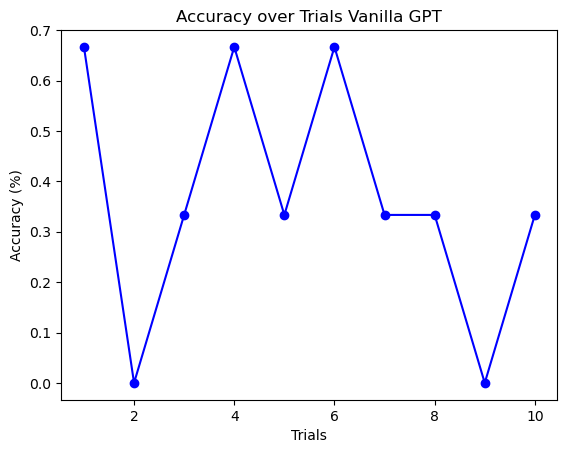

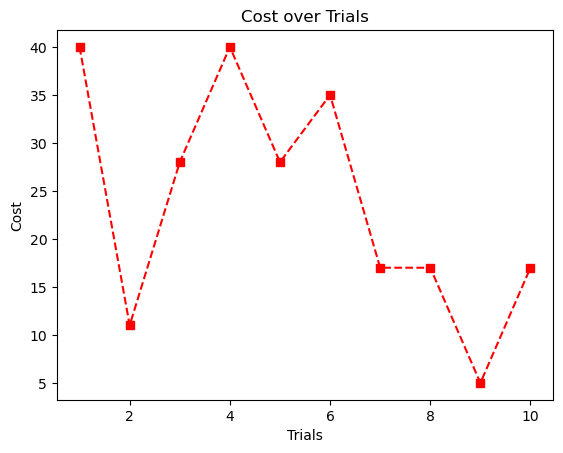

In [47]:
import numpy as np
import matplotlib.pyplot as plt

prompt, task_list = setup_hard()
print(prompt)

total_accuracy = np.array([])
cost = np.array([])

for i in range(10): 
  setup_hard()
  message = get_GPT_plan(prompt)
  print(f"\n\n message: \n {message}\n\n")
  eval = execute_tasks(message, task_list)
  print(eval[0])
  print(eval[1])
  total_accuracy = np.append(total_accuracy, eval[1])
  cost = np.append(cost, eval[2])

print('Overall accuracy: ', total_accuracy.mean())

# Number of trials (x-axis values)
trials = np.arange(1, len(total_accuracy) + 1)

plt.figure()  # Create a new figure for the first plot
plt.plot(trials, total_accuracy, marker='o', linestyle='-', color='b')
plt.title('Accuracy over Trials Vanilla GPT')
plt.xlabel('Trials')
plt.ylabel('Accuracy (%)')

# Create the second plot for another model (e.g., Model B)
plt.figure()  # Create a new figure for the second plot
plt.plot(trials, cost, marker='s', linestyle='--', color='r')
plt.title('Cost over Trials')
plt.xlabel('Trials')
plt.ylabel('Cost')

# Show both plots
plt.show()



AUTO TRAINING DATA GEN STARTS HERE

In [82]:
from pprint import pprint
tasks = {
    "go to": {
        "needs": {},  # No specific resource needs  
        "depletes": {},  # No resources are depleted
        "place": {},
        "cost": 5,
    },
    "check": {
        "needs": {},
        "depletes": {},
        "place": {},
        "cost": 3,
    },
    "check inventory": {
        "needs": {},
        "depletes": {}, 
        "place": {},
        "cost": 1,
    }
}

In [83]:
class Cost(BaseModel):
    cost: int
def set_price(resource):
    message = client.beta.chat.completions.parse(
      model="gpt-4o-2024-08-06",
      messages=[
        {"role": "system", "content": "You are a master task creator for a home environment"},
        {"role": "user", "content": f"""You are tasked with setting the price for {resource}. The price can be between 1 and 20. For context, a toothpase is 5 and soap is 3."""
         }
      ],
      response_format=Cost
    )
    return message.choices[0].message.parsed.cost

set_price("trimmer")

12

In [84]:
from typing import Dict

class Task(BaseModel):
    task_description: str
    needs: str       # A dictionary of needs, e.g., {"water": 1}
    amount_needs: int
    depletes: str    # A dictionary of depleted resources, e.g., {"water": 1}
    amount_depletes: int
    place: str                  # Location where the task happens, e.g., "kitchen"
    cost: int                   # Associated cost, e.g., 5

class TaskNoNeed(BaseModel):
    task_description: str
    place: str                  # Location where the task happens, e.g., "kitchen"
    cost: int                   # Associated cost, e.g., 5

class Tasks(BaseModel):
    generated_list: list[Task]

task_example = '''"light 2 candles": {
    "needs": {"candle": 2},
    "depletes": {"candle": 0},
    "place": "bedroom",
    "cost": 5
}'''

car_example = ''' 'polish car dashboard': {  'cost': 7, 'depletes': {  'soap': 2}, 'needs': {'soap': 2},'place': 'garage'} '''

def task_gen_no_needs(room, tasks_done):
    message = client.beta.chat.completions.parse(
      model="gpt-4o-2024-08-06",
      messages=[
        {"role": "system", "content": "You are a master task creator for a home environment"},
        {"role": "user", "content": f"""You are tasked with creating a task to be done by a butler in a home environment. 
         The task must be something that can be done in a {room}. Give the task descripton in about 3 to 5 words. 
         Lastly, you will assign a cost to the task between 1 and 20. A cost of one might be for dusting the coffee table. 
         A cost of 20 would be for cooking chicken pasta. The format is:{task_example}.""" +
         "Keep resource names in your response singular."+
         "Please avoid creating tasks of this nature since you have already suggested them: " + str(tasks_done) +
         "Forbidden tasks also include any that have the phrases 'go to', 'refill', or 'buy'"
         }
      ],
      response_format=TaskNoNeed
    )
    return message.choices[0].message.parsed

def task_gen(room, resource_types, min_resources, resource_used):
    message = client.beta.chat.completions.parse(
      model="gpt-4o-2024-08-06",
      messages=[
        {"role": "system", "content": "You are a master task creator for a home environment"},
        {"role": "user", "content": f"""You are tasked with creating a task to be done by a butler in a home environment. 
         The task must be something that can be done in a {room}. Give the task descripton in about 3 to 5 words. You must also decide what resource will be needed. 
         You must decide one resonable resource that the task needs from this list: {resource_types}. 
         You decide how much of a resource will be needed. It must need quantity {min_resources} at the minimum. Be reasonable and use common sense.
         You can choose if the resource will be depleted or not. If you decide to deplete it must be {min_resources}. 
         BEWARE: You do not have to assign anything to be depleted. You can just put nothing in the depletes section and a 0 for amount depleted. 
         Lastly, you will assign a cost to the task between 1 and 20. A cost of one might be for dusting the coffee table. 
         A cost of 20 would be for cooking chicken pasta. The format is:{task_example}.""" + 
         "Please avoid creating a task that uses or in general using these resources: " + str(resource_used) +
         "Keep resource names in your response singular." +
         "Please avoid creating tasks of this nature since you have already suggested them: " + str(tasks.keys()) +
         "Forbidden task names are synomyms of these tasks, like 'Replenish' or 'Purchase' and 'Check'" +
         "Never return a task that has the words: 'go to', 'refill', or 'buy'." +
         "Lastly, always make sure that the resource you have chosen for the task to need is reasonable." +
         " Here are some examples" +
         {car_example}, 
        
        }
      ],
      response_format=Task
    )
    return message.choices[0].message.parsed
print(task_gen("kitchen", ["water", "coffee"], 3, "windex"))

task_description='Brew fresh coffee' needs='coffee' amount_needs=3 depletes='coffee' amount_depletes=3 place='kitchen' cost=12


In [ ]:
house_resources = {
    "Kitchen": [
        "compost bags", 
        "dish soap", 
        "cooking oil", 
        "spices", 
        "paper towels", 
        "food items", 
        "cleaning wipes", 
        "baking supplies", 
        "coffee/tea", 
        "dish detergent"
    ],
    "Living Room": [
        "candles", 
        "batteries", 
        "light bulbs", 
        "cleaning supplies", 
        "air fresheners", 
        "pet food", 
        "coasters", 
        "decorative items", 
        "throw blankets", 
        "beverages"
    ],
    "Bathroom": [
        "toilet paper", 
        "soap", 
        "shampoo", 
        "cleaning products", 
        "cotton swabs", 
        "air fresheners", 
        "trash bags", 
        "towels", 
        "deodorant", 
        "shaving cream"
    ],
    "Bedroom": [
        "bed linens", 
        "laundry detergent", 
        "scented candles", 
        "moisturizer", 
        "deodorant", 
        "hygiene products", 
        "blankets", 
        "beverages", 
        "batteries", 
        "pillows"
    ],
    "Dining Room": [
        "food items", 
        "beverages", 
        "candles", 
        "napkins", 
        "cleaning supplies", 
        "condiments", 
        "utensils", 
        "dishware", 
        "table decorations", 
        "tablecloths"
    ],
    "Garage": [
        "gasoline", 
        "cleaning supplies", 
        "oil", 
        "batteries", 
        "maintenance fluids", 
        "trash bags", 
        "paint", 
        "lubricants", 
        "spare parts", 
        "petrol"
    ],
    "Laundry Room": [
        "laundry detergent", 
        "fabric softener", 
        "stain removers", 
        "dryer sheets", 
        "air fresheners", 
        "cleaning supplies", 
        "lint rollers", 
        "hangers", 
        "trash bags", 
        "laundry baskets"
    ],
    "Home Office": [
        "printer ink", 
        "paper", 
        "batteries", 
        "office supplies", 
        "cleaning supplies", 
        "notebooks", 
        "sticky notes", 
        "trash bags", 
        "coffee/tea", 
        "whiteboard markers"
    ],
    "Hallway/Entryway": [
        "light bulbs", 
        "cleaning supplies", 
        "air fresheners", 
        "batteries", 
        "trash bags", 
        "welcome mats", 
        "shoe polish", 
        "seasonal decorations", 
        "umbrellas", 
        "coat hangers"
    ],
    "Basement": [
        "cleaning supplies", 
        "dehumidifier water", 
        "light bulbs", 
        "batteries", 
        "safety supplies", 
        "tools", 
        "storage bins", 
        "trash bags", 
        "spare parts", 
        "lawn care supplies"
    ]
}


In [85]:
# Generate Test Data

# push to require:
# trips to the store/buy req = Boolean. This would mean that the sum of resources in rooms and pantry is less than what is needed.

# trips to the pantry/buy refill = N where N < number of rooms involved. A trip to the pantry is needed when the resources in the room are less than what is needed. Namely, number of resources in room are less than
# what the task needs. To achieve complexity N, we initialize the room X with 1 (or more) less than what is needed for the task in room X.

# go to requirements: To force an additional N go to's excluding the ones needed for trips to the store or pantry, add custom tasks in N + 1 different rooms.

# We have sandwiches here: 'go to storage, refill X in X, go to room X' should be triggered in a gold trajectory when a deficit exists.

rooms = ["kitchen", "bedroom", "living room", "garage", "bathroom"]
resource_types = ["toothpaste", "soap", "tomato", "bread", "butter", "milk", "windex", "clorox wipe", "toilet paper", "candle", "apple", "oat"]






def generate_training_data(buy_req=False, trip_req=0, goto_req=0, no_needs = 0, resource_types=resource_types):
    # Update Task List with Refills and buys:
    for resource in resource_types:
        price = set_price(resource)
        tasks["refill " + resource] = { "needs" : {}, "depletes" : {}, "place": "storage", "cost": 5}
        tasks["buy " + resource] = { "needs" : {}, "depletes" : {}, "place": "store", "cost": price}
        
    min_resources = buy_req + trip_req
    min_tasks = goto_req + buy_req + trip_req

    # call gpt and ask for a random task
    # Custom Tasks Generation
    resource_used = []
    gen_tasks = []
    tasks_done = []
    for j in range(no_needs):
        room = rooms[np.random.randint(0, len(rooms))]
        task = task_gen_no_needs(room, tasks_done)
        tasks_done.append(task.task_description.lower())
        tasks[task.task_description.lower()] = { "needs" : {}, "depletes" : {}, "place": room, "cost": task.cost}
        gen_tasks.append(task.task_description.lower())

    for i in range(min_tasks):
        room = rooms[np.random.randint(0, len(rooms))]
        resources = np.random.randint(min_resources+1, min_resources + 3)
        task = task_gen(room, resource_types, resources, resource_used)
        if task.depletes == '':
            task.depletes = task.needs
        tasks[task.task_description.lower()] = { "needs" : {task.needs: task.amount_needs}, "depletes" : {task.depletes: task.amount_depletes}, "place": room, "cost": task.cost}
        resource_used.append(task.needs)
        gen_tasks.append(task.task_description.lower())
    
    return tasks, gen_tasks

tasks, gen_tasks = generate_training_data(buy_req=True, trip_req=2, goto_req=3, no_needs=3)
pprint(tasks, indent=4)

    





{   'buy apple': {'cost': 4, 'depletes': {}, 'needs': {}, 'place': 'store'},
    'buy bread': {'cost': 4, 'depletes': {}, 'needs': {}, 'place': 'store'},
    'buy butter': {'cost': 7, 'depletes': {}, 'needs': {}, 'place': 'store'},
    'buy candle': {'cost': 7, 'depletes': {}, 'needs': {}, 'place': 'store'},
    'buy clorox wipe': {   'cost': 4,
                           'depletes': {},
                           'needs': {},
                           'place': 'store'},
    'buy milk': {'cost': 4, 'depletes': {}, 'needs': {}, 'place': 'store'},
    'buy oat': {'cost': 4, 'depletes': {}, 'needs': {}, 'place': 'store'},
    'buy soap': {'cost': 3, 'depletes': {}, 'needs': {}, 'place': 'store'},
    'buy toilet paper': {   'cost': 6,
                            'depletes': {},
                            'needs': {},
                            'place': 'store'},
    'buy tomato': {'cost': 4, 'depletes': {}, 'needs': {}, 'place': 'store'},
    'buy toothpaste': {   'cost': 4,
          

In [86]:
def main_stock_maker(task_list):
    temp_main_stock = {}
    for task in task_list:
        needs_dict = tasks[task]['needs']
        for resource, amount in needs_dict.items():
            temp_main_stock[resource] = temp_main_stock.get(resource, 0) + 0
    return temp_main_stock


In [87]:

def room_stocks_maker(task_list):
    global room_stocks
    room_stocks.clear()
    resource_set = set()
    temp_room_stocks = {}
    for task in task_list:
        room = tasks[task]['place']
        temp_room_stocks[room] = temp_room_stocks.get(room, {})
        needs_dict = tasks[task]['needs']
        for resource, amount in needs_dict.items():
            temp_room_stocks[room][resource] = temp_room_stocks[room].get(resource, 0) + amount
    temp_room_stocks["store"] = {resource: 0 for resource in resource_set}
    print("I've updated room_stocks", temp_room_stocks)
  
    return temp_room_stocks

        
        

In [125]:
def setup_game(task_list):
    print("Setting up the game...")
    goto("start")
    room_stocks_filled = room_stocks_maker(task_list)
    main_stock_filled = main_stock_maker(task_list)
    init_main_stock(main_stock_filled)
    init_room_stock(room_stocks_filled)
    prompt = prompt_maker(task_list, CoT=True)
    return prompt, task_list


In [126]:

prompt, task_list = setup_game(gen_tasks)
new_list = get_GPT_plan(prompt[0])
print(prompt[1])
print(prompt[2])

Setting up the game...
Already at start.
I've updated room_stocks {'bathroom': {'clorox wipe': 6, 'windex': 5}, 'kitchen': {'tomato': 4, 'apple': 4, 'oat': 5}, 'living room': {'candle': 5}, 'store': {}}
WELCOME TO THE GAME! Getting prompt...
A bathroom with 6 clorox wipe and 5 windex. 
A kitchen with 4 tomato, 4 apple and 5 oat. 
A living room with  and 5 candle. 

0 tomato, 0 clorox wipe, 0 apple, 0 windex, 0 oat, 0 candle


In [127]:
#execute_tasks(new_list, task_list)
total_accuracy = []
cost = []
for i in range(10): 
  prompt, needed_task_list = setup_game(gen_tasks)
  prompt = prompt[0]
  print("TASKLIST", needed_task_list, prompt)
  candidate_task_list = get_GPT_plan(prompt)
  print(f"\n\n message: \n {candidate_task_list}\n\n")
  eval = execute_tasks(candidate_task_list, needed_task_list)
  print("Outcome: ", eval[0])
  print("Trial accuracy: ", eval[1])
  total_accuracy = np.append(total_accuracy, eval[1])
  cost = np.append(cost, eval[2])

print('Overall accuracy: ', total_accuracy.mean())

# Number of trials (x-axis values)
trials = np.arange(1, len(total_accuracy) + 1)

plt.figure()  # Create a new figure for the first plot
plt.plot(trials, total_accuracy, marker='o', linestyle='-', color='b')
plt.title('Accuracy over Trials Vanilla GPT')
plt.xlabel('Trials')
plt.ylabel('Accuracy (%)')

# Create the second plot for another model (e.g., Model B)
plt.figure()  # Create a new figure for the second plot
plt.plot(trials, cost, marker='s', linestyle='--', color='r')
plt.title('Cost over Trials')
plt.xlabel('Trials')
plt.ylabel('Cost')

# Show both plots
plt.show()

Setting up the game...
Already at start.
I've updated room_stocks {'bathroom': {'clorox wipe': 6, 'windex': 5}, 'kitchen': {'tomato': 4, 'apple': 4, 'oat': 5}, 'living room': {'candle': 5}, 'store': {}}
WELCOME TO THE GAME! Getting prompt...
TASKLIST ['organize bath product', 'wash kitchen floor', 'chop vegetables finely', 'prepare tomato sandwiches', 'sanitize bathroom surfaces', 'slice apples thinly', 'clean bathroom mirror', 'make oat porridge', 'light 5 candles'] Hello! You are a butler in a home that has many rooms and a storage that acts as a pantry. You goal is to finish the tasks I will give you. Beware! These tasks require resources and may even deplete resources. You can use the storage to refill them! If even the storage doesn't have enough resources, you can buy from the store! 
You are standing in the start. The home has: 
A bathroom with 6 clorox wipe and 5 windex. 
A kitchen with 4 tomato, 4 apple and 5 oat. 
A living room with  and 5 candle. 
Your home's storage has: 
0

KeyboardInterrupt: 

In [ ]:

from collections import defaultdict
def gold_trajectory_generator(needed_task_list):
    setup_game(needed_task_list)
    gold_list = []
    room_to_task = defaultdict(list)
    for task in needed_task_list:
        room_to_task[tasks[task]['place']].append(task)
    for key, value in room_to_task.items():
        gold_list.append("go to " + key)
        for task in value:
            gold_list.append(task)
    return gold_list
print(needed_task_list)            
gold_list = gold_trajectory_generator(gen_tasks)
print(gold_list)

eval = execute_tasks(gold_list, needed_task_list)
print(eval[0])
print(eval[1])

['fluff pillow', 'brew fresh coffee', 'organize clothes drawer', 'prepare tomato soup', 'polish bedroom windows', 'wipe down surfaces', 'organize book shelves', 'polish coffee table', 'fold fresh laundry']
Setting up the game...
Moved to start.
I've updated room_stocks {'bedroom': {'windex': 5, 'candle': 4, 'toilet paper': 4}, 'kitchen': {'tomato': 4}, 'living room': {'clorox wipe': 4, 'soap': 5}, 'store': {}}
WELCOME TO THE GAME
['go to bedroom', 'fluff pillow', 'organize clothes drawer', 'polish bedroom windows', 'organize book shelves', 'fold fresh laundry', 'go to kitchen', 'brew fresh coffee', 'prepare tomato soup', 'go to living room', 'wipe down surfaces', 'polish coffee table']
Now executing ['go to bedroom', 'fluff pillow', 'organize clothes drawer', 'polish bedroom windows', 'organize book shelves', 'fold fresh laundry', 'go to kitchen', 'brew fresh coffee', 'prepare tomato soup', 'go to living room', 'wipe down surfaces', 'polish coffee table'] AGAINST ['fluff pillow', 'brew

In [131]:
import random
export_tasks = {}
# bigger keys are: unique id
# sub keys are: prompt, tasks_dict, needed_tasks, gold_list, gpt_list, gpt_eval, gold_eval

needed_simple_tasks = 10
for i in range(needed_simple_tasks):
    tasks = temp_tasks.copy()
    unique_id = random.randint(10000, 99999)
    export_tasks[unique_id] = {}

    tasks_dict, needed_tasks = generate_training_data(buy_req=True, trip_req=2, goto_req=3, no_needs=3)
    export_tasks[unique_id]["tasks_dict"] = tasks_dict
    export_tasks[unique_id]["needed_tasks"] = needed_tasks
    tasks = tasks_dict.copy()
    gold_list = gold_trajectory_generator(needed_tasks)
    export_tasks[unique_id]["gold_list"] = gold_list

    big_prompt, task_list = setup_game(needed_tasks)
    prompt = big_prompt[0]
    export_tasks[unique_id]["prompt"] = prompt
    export_tasks[unique_id]["room_stocks"] = big_prompt[1]
    export_tasks[unique_id]["main_stock"] = big_prompt[2]

    gpt_list = get_GPT_plan(prompt)
    export_tasks[unique_id]["gpt_list"] = gpt_list

    print("Tasks after generation", tasks)
    print("Room stocks before GPT evaluation: ", room_stocks)
    gpt_eval = execute_tasks(gpt_list, needed_tasks)
    export_tasks[unique_id]["gpt_eval"] = gpt_eval

    print(gpt_eval[0])
    print(gpt_eval[1])

    prompt, task_list = setup_game(needed_tasks)
    print("Room stocks before gold evaluation: ", room_stocks)
    gold_eval = execute_tasks(gold_list, needed_tasks)
    export_tasks[unique_id]["gold_eval"] = gold_eval

    print(gold_eval[0])
    print(gold_eval[1])

pprint(export_tasks, indent=3)




Setting up the game...
Moved to start.
I've updated room_stocks {'garage': {'butter': 5}, 'bedroom': {}, 'kitchen': {'bread': 4}, 'living room': {'windex': 5, 'soap': 4}, 'bathroom': {'clorox wipe': 5, 'toilet paper': 4}, 'store': {}}
WELCOME TO THE GAME! Getting prompt...
Setting up the game...
Already at start.
I've updated room_stocks {'garage': {'butter': 5}, 'bedroom': {}, 'kitchen': {'bread': 4}, 'living room': {'windex': 5, 'soap': 4}, 'bathroom': {'clorox wipe': 5, 'toilet paper': 4}, 'store': {}}
WELCOME TO THE GAME! Getting prompt...
Tasks after generation {'brush teeth': {'needs': {'toothpaste': 1}, 'depletes': {'toothpaste': 1}, 'place': 'bathroom', 'cost': 15}, 'drink water': {'needs': {'water': 1}, 'depletes': {'water': 1}, 'place': 'kitchen', 'cost': 5}, 'clean dish': {'needs': {'soap': 1}, 'depletes': {'soap': 1}, 'place': 'kitchen', 'cost': 12}, 'make soup': {'needs': {'water': 1, 'tomato': 1}, 'depletes': {'water': 1, 'tomato': 1}, 'place': 'kitchen', 'cost': 12}, 'bu

{37692: {'gpt_eval': ('Success', 0.8888888888888888, 88), 'gold_eval': ('Success', 1.0, 108)}, 83123: {'gpt_eval': ('FailureMust be at store. You are at storage.', 0.6666666666666666, 73), 'gold_eval': ('Success', 1.0, 104)}, 96973: {'gpt_eval': ('FailureMust be at bedroom. You are at living room.', 0.2222222222222222, 25), 'gold_eval': ('Success', 1.0, 89)}, 96140: {'gpt_eval': ('Failure, buying clorox wipe failed. Walmart doesnt have enough clorox wipe.', 0.4444444444444444, 62), 'gold_eval': ('Success', 1.0, 100)}, 98076: {'gpt_eval': ('Failure, buying oat failed. Walmart doesnt have enough oat.', 0.0, 10), 'gold_eval': ('Success', 1.0, 115)}, 57063: {'gpt_eval': ('FailureMust be at bedroom. You are at living room.', 0.1111111111111111, 18), 'gold_eval': ('Success', 1.0, 102)}, 77368: {'gpt_eval': ('FailureMust be at store. You are at storage.', 0.1111111111111111, 22), 'gold_eval': ('Success', 1.0, 121)}, 46646: {'gpt_eval': ('Failure, buying clorox wipe failed. Walmart doesnt have

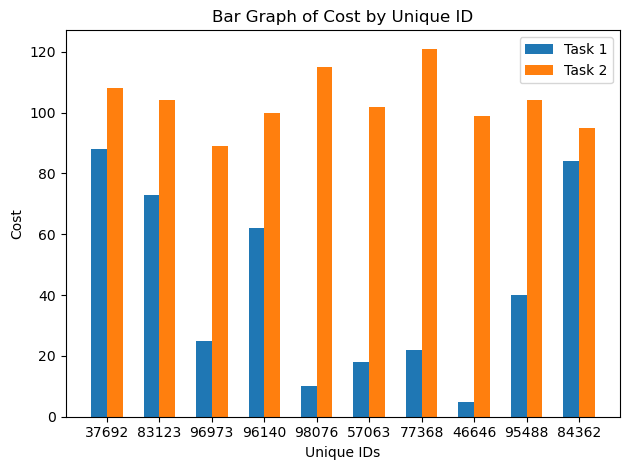

In [132]:
import matplotlib.pyplot as plt

# Example dictionary
data = {}
for unique_id, subdict in export_tasks.items():
    for key, value in subdict.items():
        if key == "gpt_eval" or key == "gold_eval":
            data[unique_id] = data.get(unique_id, {})
            data[unique_id][key] = data.get(unique_id, {}).get(key, [])
            data[unique_id][key] = value
print(data)

# Prepare the x-axis labels (unique ids) and corresponding bar values
unique_ids = list(data.keys())
tasks = []
third_values = []

for unique_id, subdict in data.items():
    tasks.append(list(subdict.keys()))  # Collect task names for each ID
    third_values.append([value[2] for value in subdict.values()])  # Collect third tuple values

# Number of unique IDs
num_ids = len(unique_ids)

# Positions for bar groups on x-axis
x = np.arange(num_ids)

# Create a bar for each task within a group of unique ids
bar_width = 0.3  # Width of individual bars
fig, ax = plt.subplots()

# Since we have multiple tasks per unique id, loop through the tasks
for i in range(len(tasks[0])):  # Assuming the same number of tasks for each ID
    # Extract the ith task's third value for each unique id
    task_values = [third_values[j][i] for j in range(num_ids)]
    
    # Create a bar for the ith task for each unique id
    ax.bar(x + i * bar_width, task_values, width=bar_width, label=f"Task {i + 1}")

# Customize the plot
ax.set_xlabel("Unique IDs")
ax.set_ylabel("Cost")
ax.set_title("Bar Graph of Cost by Unique ID")
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(unique_ids)  # Set x-axis labels to the unique ids
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


0.3555555555555555


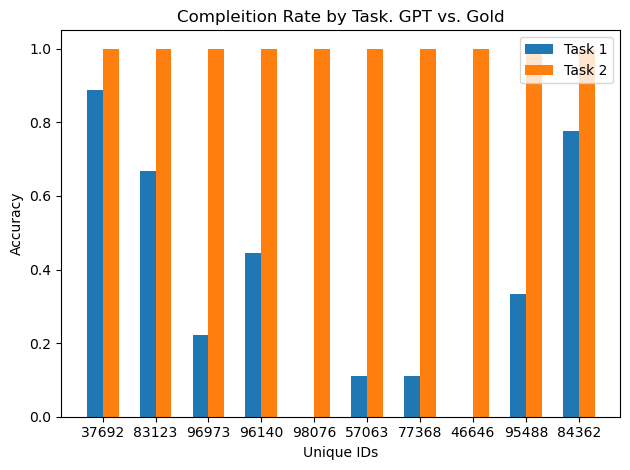

In [133]:
# Prepare the x-axis labels (unique ids) and corresponding bar values
unique_ids = list(data.keys())
tasks = []
third_values = []

for unique_id, subdict in data.items():
    tasks.append(list(subdict.keys()))  # Collect task names for each ID
    third_values.append([value[1] for value in subdict.values()])  # Collect third tuple values

# Number of unique IDs
num_ids = len(unique_ids)

# Positions for bar groups on x-axis
x = np.arange(num_ids)

# Create a bar for each task within a group of unique ids
bar_width = 0.3  # Width of individual bars
fig, ax = plt.subplots()

# Since we have multiple tasks per unique id, loop through the tasks
for i in range(len(tasks[0])):  # Assuming the same number of tasks for each ID
    # Extract the ith task's third value for each unique id
    task_values = [third_values[j][i] for j in range(num_ids)]
    
    # Create a bar for the ith task for each unique id
    ax.bar(x + i * bar_width, task_values, width=bar_width, label=f"Task {i + 1}")

# Customize the plot
ax.set_xlabel("Unique IDs")
ax.set_ylabel("Accuracy")
ax.set_title("Compleition Rate by Task. GPT vs. Gold")
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(unique_ids)  # Set x-axis labels to the unique ids
ax.legend()

print(np.mean(np.array(third_values)[:,0]))

# Show plot
plt.tight_layout()
plt.show()

In [168]:
# SayCanPay Impl
# We take the gold trajectory and use discounting factor 0.9
# Each batch is [[snapshot, gold, history, curr_action, reward], ..., [needed, history, curr_action, reward]]

trajectories = {}

for unique_id, subdict in export_tasks.items():
    for key, value in subdict.items():
        if key == "gold_list":
            trajectories[unique_id] = [subdict.get("gold_list"), subdict.get("room_stocks"),subdict.get("main_stock"), subdict.get("needed_tasks")]
#pprint(trajectories)

reward_traj = defaultdict(list)
for key, value in trajectories.items():
    history = []
    reward = 1
    for i, action in enumerate(value[0]):
        reward = 0.9 ** (len(value[0]) - i - 1)
        snapshot = f'The home has {value[1]}. The pantry has {value[2]}.'
        reward_traj[key].append([snapshot, value[3], value[0][:i], action, reward])

pprint(reward_traj)

for key, value in reward_traj.items():
    val = random.random()
    bad_list = 1 if val < 0.30 else 0
    if bad_list:
        print(len(value[3]))



defaultdict(<class 'list'>,
            {37692: [['The home has A garage with  and 5 butter. \n'
                      'A kitchen with  and 4 bread. \n'
                      'A living room with 5 windex and 4 soap. \n'
                      'A bathroom with 5 clorox wipe and 4 toilet paper. \n'
                      '. The pantry has 0 bread, 0 windex, 0 clorox wipe, 0 '
                      'soap, 0 toilet paper, 0 butter.',
                      ['organize tool shelf',
                       'sweep garage floor',
                       'replace bed linen',
                       'make grilled cheese',
                       'clean window with windex',
                       'clean bathroom sink',
                       'organize bookshelf',
                       'stock toilet paper',
                       'polish car dashboard'],
                      [],
                      'go to garage',
                      0.2541865828329001],
                     ['The home has A garage 

In [145]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel

# Sample data dictionary (replace with your actual data)
data = {
    "id1": [
        ["The kitchen has 3 apples", ["go to kitchen", "wash dishes", "go to store", "buy apples"], ["go to kitchen"], "buy apples", 0.9],
        ["The bathroom has soap", ["go to bathroom", "replace soap"], ["go to bathroom"], "replace soap", 1.0]
    ],
    # more data...
}

data = reward_traj

# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Custom Dataset
class TaskDataset(Dataset):
    def __init__(self, data):
        self.data = data
        self.samples = []
        
        # Flatten the dictionary into a list of samples
        for uid, tasks in data.items():
            for task in tasks:
                snapshot, goal, history, action, reward = task
                input_text = f"Snapshot: {snapshot}. History: {', '.join(history)}. Goal: {goal}. Next action: {action}."
                self.samples.append((input_text, reward))
    
    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        input_text, reward = self.samples[idx]
        inputs = tokenizer(input_text, return_tensors="pt", padding='max_length', truncation=True, max_length=512)
        return inputs['input_ids'].squeeze(), inputs['attention_mask'].squeeze(), torch.tensor(reward, dtype=torch.float)

# Create Dataset and DataLoader
dataset = TaskDataset(data)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)


In [146]:
# BERT Model with a regression layer to predict the reward
class BERTRewardPredictor(nn.Module):
    def __init__(self, model_name='bert-base-uncased'):
        super(BERTRewardPredictor, self).__init__()
        self.bert = BertModel.from_pretrained(model_name)
        self.regressor = nn.Linear(self.bert.config.hidden_size, 1)  # Predict a scalar reward

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.pooler_output  # Get the [CLS] token representation
        reward_pred = self.regressor(cls_output)  # Output the predicted reward
        return reward_pred.squeeze()


In [147]:
# Initialize model, loss function, and optimizer
model = BERTRewardPredictor()
criterion = nn.MSELoss()  # Mean Squared Error Loss for reward prediction
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

# Make sure the model is on CPU
model.to('cpu')

# Training loop
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for input_ids, attention_mask, true_reward in dataloader:
        # Move tensors to device (if using GPU)
        input_ids = input_ids.to('cpu')
        attention_mask = attention_mask.to('cpu')
        true_reward = true_reward.to('cpu')
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        predicted_reward = model(input_ids, attention_mask)
        
        # Compute loss
        loss = criterion(predicted_reward, true_reward)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Accumulate loss
        running_loss += loss.item()
    
    # Print loss for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(dataloader):.4f}")


Epoch [1/5], Loss: 0.0596
Epoch [2/5], Loss: 0.0157
Epoch [3/5], Loss: 0.0054
Epoch [4/5], Loss: 0.0074
Epoch [5/5], Loss: 0.0087


In [156]:
model.eval()

test_snapshot = "The home has: A bedroom with and 1 candle. A kitchen with 1 tomato and 1 soap. A bathroom with and 2 toothpaste. Your home's pantry has: 0 candle, 0 toothpaste, 0 soap, 0 tomato. The tasks you need to comlete are: make tomato soup, clean a dish, brush teeth, light a candle."
test_gold = ["go to bedroom", "light a candle", "go to bathroom", "brush teeth", "go to kitchen", "make tomato soup", "clean a dish"]
test_history = ["go to bedroom", "light a candle", "go to bathroom", "brush teeth"]
test_action = "clean a dish"

input_text = f"Snapshot: {test_snapshot}. History: {', '.join(test_history)}. Goal: {test_gold}. Next action: {test_action}."
inputs = tokenizer(input_text, return_tensors="pt", padding='max_length', truncation=True, max_length=512)

with torch.no_grad():
    input_ids = inputs['input_ids'].to('cpu')
    attention_mask = inputs['attention_mask'].to('cpu')
    predicted_reward = model(input_ids, attention_mask)
    print(f"Predicted Reward: {predicted_reward.item():.4f}")

Predicted Reward: 0.4997
